In [2]:
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from raw_data_class import RawData as RDC
from Functions import *
%matplotlib notebook

In [ ]:
epix_roi= [90,140,190,300]
xrt_roi = [400,1100]
xtc_smd_dir = '/reg/d/psdm/cxi/cxilv2718/xtc/smalldata/'
load_data_input = ['/reg/d/psdm/cxi/cxilv2718/results/data/',epix_roi,xrt_roi]
i=1
while i is 1:
    monitor_files.monitor_and_process(xtc_smd_dir,load_data_input)
    time.sleep(60)

Data loaded in 472.9 seconds.rently on shot: 36401
2040 out of 38441 shots had empty values.
Data loaded in 492.8 seconds.rently on shot: 29767
1900 out of 31667 shots had empty values.
No new runs. Last run processed: 43 | 2021-05-29 02:07:35.042520
No new runs. Last run processed: 43 | 2021-05-29 02:08:35.094564
No new runs. Last run processed: 43 | 2021-05-29 02:09:35.160082
No new runs. Last run processed: 43 | 2021-05-29 02:10:35.230076
No new runs. Last run processed: 43 | 2021-05-29 02:11:35.271946
No new runs. Last run processed: 43 | 2021-05-29 02:12:35.320215
No new runs. Last run processed: 43 | 2021-05-29 02:13:35.385826
No new runs. Last run processed: 43 | 2021-05-29 02:14:35.438671
No new runs. Last run processed: 43 | 2021-05-29 02:15:35.506512
No new runs. Last run processed: 43 | 2021-05-29 02:16:35.548849
No new runs. Last run processed: 43 | 2021-05-29 02:17:35.616073
No new runs. Last run processed: 43 | 2021-05-29 02:18:35.681695
No new runs. Last run processed: 4

In [48]:
save_dir = 1
xtc_smd_dir = '/reg/d/psdm/cxi/cxilv2718/xtc/smalldata/'
x = os.listdir(xtc_smd_dir)
print(x)
test = []
# runs_in_dir = [test.append(any('r00' in x[i])) for i in range(0,len(x))]
check_for = '-r'
# any('r00') in x[0]
any(check_for in files for files in x)
test
run_list = np.unique([int(x[i][11:15]) for i in range(0,len(x)) if check_for in x[i]])
print(run_list)

['cxilv2718-r0001-s02-c00.smd.xtc', 'cxilv2718-r0001-s00-c00.smd.xtc', 'cxilv2718-r0002-s80-c00.smd.xtc', 'cxilv2718-r0001-s80-c00.smd.xtc', 'cxilv2718-r0002-s00-c00.smd.xtc', 'cxilv2718-r0002-s02-c00.smd.xtc', 'cxilv2718-r0002-s01-c00.smd.xtc', 'cxilv2718-r0001-s81-c00.smd.xtc', 'cxilv2718-r0002-s03-c00.smd.xtc', 'md5', 'cxilv2718-r0001-s03-c00.smd.xtc', 'cxilv2718-r0002-s81-c00.smd.xtc', 'cxilv2718-r0001-s01-c00.smd.xtc']
[1 2]


In [26]:
x = os.listdir(xtc_smd_dir)
nameSet = set(np.unique([int(x[i][11:15]) for i in range(0,len(x)) if '-r' in x[i]]))
nameSet
ds_string = 'exp=cxix46119:run='+str(2)+':smd'
ds_string

'exp=cxix46119:run=2:smd'

In [27]:
ds = ps.DataSource(ds_string)

events = []
eventIDS = []
for nevent, evt in enumerate(ds.events()):
    eventIDS.append(nevent)
    events.append(evt)
# detNames = ps.DetNames()
# for detname in DetNames(): 
#     print(detname)
dir(events[3])
ps.DetNames()

[('XrayTransportDiagnostic.0:OrcaFl40.0', 'fee_spec', ''),
 ('NoDetector.0:Evr.1', 'evr1', ''),
 ('NoDetector.0:Evr.2', 'evr2', ''),
 ('EBeam', '', ''),
 ('PhaseCavity', '', ''),
 ('FEEGasDetEnergy', '', ''),
 ('FEE-SPEC0', '', ''),
 ('CXI-DG2-BMMON', '', ''),
 ('CXI-DG3-BMMON', '', ''),
 ('CxiDs1.0:Wave8.0', 'CXI-DG2-BMMON-WF', ''),
 ('CxiDs1.0:Wave8.1', 'CXI-SC1-BMMON-WF', ''),
 ('ControlData', '', '')]

In [2]:
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
runs = [10,12]
plot_one = 10
scan_name = 'run_'+ str(plot_one)
x_axis='energy'
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
calib_dir = '/reg/d/psdm/cxi/cxilv2718/results/calibrations/'
calibration_file = 'calibration_1'
to_cal_file = [calib_dir, calibration_file]
# Processing or Loading
process_raw = False
on_off = True # Do you want to plot the raw data?
raw_datas = []
stack_scans = True

for run in runs:
    scan_name = 'run_' + str(run)
    with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
        raw_data = pickle.load(f)
    raw_datas = [raw_datas] + raw_data

# plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)
plt.figure()

TypeError: can only concatenate list (not "RawData") to list

<class 'numpy.bool_'>


/reg/data/ana16/cxi/cxilv2718/results/LCLS_LV_27_Data_Analysis/Functions/Filters.py:91: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(var_x[bounds_conds][:,np.newaxis],var_y[bounds_conds])


<IPython.core.display.Javascript object>


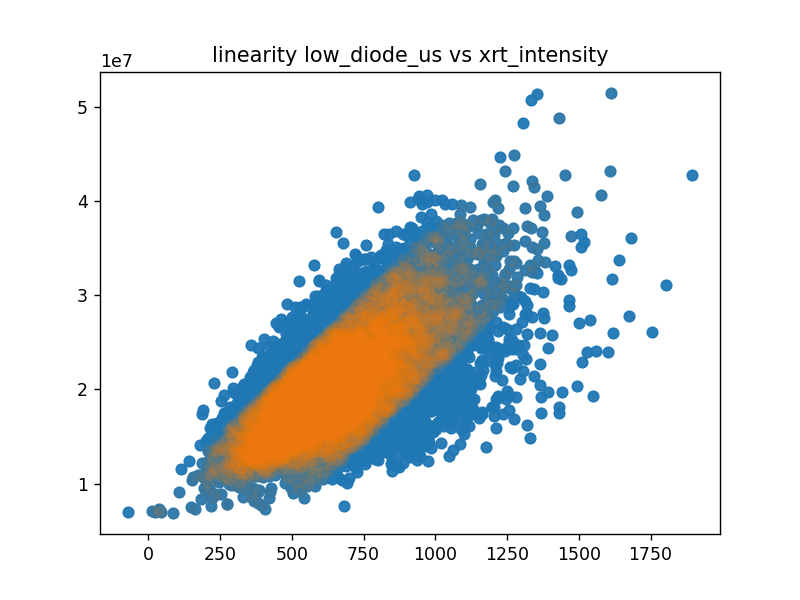

Filter info for run_10:
Filter0 removed 1307 unique shots out of 13622 total shots.
The combined filters removed 1307 shots out of 13622 total shots.



In [9]:
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
scan_name = 'run_10'
with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
    raw_data = pickle.load(f)
# var_x = getattr(raw_data,filt_param[2][0])
# var_y = getattr(raw_data,filt_param[2][1])
# var_x = var_x
# var_y = var_y
# lin_fit = np.polyfit(var_x[bounds_conds], var_y[bounds_conds], 1)
# cond_lin_high = var_y < var_x * lin_fit[0] + lin_fit[1] + filt_param[2][2]
# cond_lin_low = var_y > var_x * lin_fit[0] + lin_fit[1] - filt_param[2][2]
# condition = cond_lin_high & cond_lin_low
# if np.logical_and(filt_param[3][0],'run_'+str(filt_param[3][1])==getattr(raw_data,'scan_name')):
# plt.figure()
# plt.scatter(var_x,var_y,alpha=0.95)
# plt.scatter(var_x[condition],var_y[condition],alpha=0.05)
# plt.title(filt_param[1]+' '+filt_param[2][0] +' vs '+ filt_param[2][1])
# plt.show()
# low_diode_us = raw_data.low_diode_us
# xrt_I = raw_data.xrt_intensity
# xrt_I = xrt_I[:,np.newaxis]
# a, _, _, _ = np.linalg.lstsq(xrt_I,low_diode_us)
plot_one = 10
# plt.figure()
# plt.plot(xrt_I,low_diode_us)
# plt.plot(xrt_I,a*xrt_I)
# filt0 = [True,'bounds',['low_diode_us',0.1,'None',2],[False,plot_one]]

filt_param = [True,'linearity',['low_diode_us','xrt_intensity',0.15,True],[True,plot_one]]
filters = [filt_param]
# filters[0][2]
conditions,test = Filters.filtering(raw_data,filters,True)
# var_x = getattr(raw_data,filt_param[2][0])
# var_y = getattr(raw_data,filt_param[2][1])
#     scale = np.max([var_x,var_y])
#     if filt_param[2][3]:
#         var_x = var_x[:,np.newaxis]
#         m, _, _, _ = np.linalg.lstsq(var_x[bounds_conds],var_y[bounds_conds])
#         var_x =np.squeeze(var_x)
#         cond_lin_high = var_y < var_x * m + filt_param[2][2]*scale
#         cond_lin_low = var_y > var_x * m - filt_param[2][2]*scale
#         condition = cond_lin_high & cond_lin_low
#     else:
#         var_x = var_x
#         var_y = var_y
#         lin_fit = np.polyfit(var_x[bounds_conds], var_y[bounds_conds], 1)
#         cond_lin_high = var_y < var_x * lin_fit[0] + lin_fit[1] + filt_param[2][2]*scale
#         cond_lin_low = var_y > var_x * lin_fit[0] + lin_fit[1] - filt_param[2][2]*scale
#         condition = cond_lin_high & cond_lin_low
#     if np.logical_and(filt_param[3][0],'run_'+str(filt_param[3][1])==getattr(raw_data,'scan_name')):
#         plt.figure()
#         plt.scatter(var_x[bounds_conds],var_y[bounds_conds],alpha=0.95)
#         plt.scatter(var_x[np.logical_and(bounds_conds,condition)],var_y[np.logical_and(bounds_conds,condition)],alpha=0.05)
#         plt.title(filt_param[1]+' '+filt_param[2][0] +' vs '+ filt_param[2][1])
#         plt.show()



In [20]:
# s = True
# t=np.bool_()
type(np.bool_(True))==type(np.bool_(True))


True